# Yelp Emotion & Helpfulness Analysis

## MBA 260 Spring 2025

## 1. Setting Up

### 1.1 Google Colab

Let's first set up the Google Colab environment.

In [ ]:
# IMPORTANT: if importing libraries (two cells below) throws an error:
# 1. Run this cell
# 2. Restart the session when it prompts you to (or go to Runtime > Restart session in the toolbar)
# 3. Then SKIP this cell and proceed as usual with the rest of the file
!pip install --force-reinstall numpy==1.23.5 pandas==1.5.3

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.1/17.1 MB 18.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.0/12.0 MB 15.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 229.9/229.9 kB 5.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 509.2/509.2 kB 7.3 MB/s eta 0:00:00
  Attempting uninstall: pytz
    Found existing installation: pytz 2025.2
    Uninstalling pytz-2025.2:
      Successfully uninstalled pytz-2025.2
  Attempting uninstall: six
    Found existing installation: six 1.17.0
    Uninstalling six-1.17.0:
      Successfully uninstalled six-1.17.0
  Attempting uninstall: numpy
    Found existing installation: numpy 2.0.2
    Uninstalling numpy-2.0.2:
      Successfully uninstalled numpy-2.0.2
  Attempting uninstall: python-dateutil
    Found existing installation: python-dateutil 2.8.2
    Uninstalling python-dateutil-2.8.2:
      Successfully uninstalled python-dateutil-2.8.2
  Attempting uninstall: pandas
    Found existing instal

In [ ]:
#### ONLY FOR COLAB RUNNING ####

from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [1]:
# Install necessary libraries (Run this in Colab)
!pip install nltk textblob wordcloud matplotlib seaborn scikit-learn gensim nrclex

# Import libraries
import pandas as pd
import numpy as np
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from textblob import TextBlob
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import seaborn as sns
from nrclex import NRCLex
import statsmodels.api as sm

# Download necessary NLTK datasets
nltk.download('punkt')
nltk.download('punkt_tab')
nltk.download('stopwords')

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.6/60.6 kB 3.7 MB/s eta 0:00:00
INFO: pip is looking at multiple versions of nrclex to determine which version is compatible with other requirements. This could take a while.
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 396.4/396.4 kB 13.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 26.7/26.7 MB 50.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 38.6/38.6 MB 17.7 MB/s eta 0:00:00
  Created wheel for nrclex: filename=NRCLex-3.0.0-py3-none-any.whl size=43309 sha256=8939ce743eb74cf1e1dcd659001eaa50593de4ef844a26b24e4b4d21ff8d5d2f
  Stored in directory: /root/.cache/pip/wheels/ed/ac/fa/7afddefd14f51c4a963ed291b9052746ed3929473e5a33118d
Successfully built nrclex
  Attempting uninstall: scipy
    Found existing installation: scipy 1.14.1
    Uninstalling scipy-1.14.1:
      Successfully uninstalled scipy-1.14.1
ERROR: pip's dependency resolver does not currently take into

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

### 1.2 Importing Data

In [3]:
# Load dataset

## REPLACE THIS URL WITH THE PATH TO YOUR FILE
url = '/content/drive/MyDrive/2 GSI/2025 MBA260/yelp_datasets/yelp_academic_dataset_review.json'

## We are reading a json file, so we are using read_json
## It is also very big, so we'll use a reader and only read 20,000 rows
reader_review_df = pd.read_json(url, lines=True, chunksize=20000)
review_df = next(reader_review_df)

FileNotFoundError: File /content/drive/MyDrive/2 GSI/2025 MBA260/yelp_datasets/yelp_academic_dataset_review.json does not exist

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
review_df.head()

,review_id,user_id,business_id,stars,useful,funny,cool,text,date
0,KU_O5udG6zpxOg-VcAEodg,mh_-eMZ6K5RLWhZyISBhwA,XQfwVwDr-v0ZS3_CbbE5Xw,3,0,0,0,"If you decide to eat here, just be aware it is...",2018-07-07 22:09:11
1,BiTunyQ73aT9WBnpR9DZGw,OyoGAe7OKpv6SyGZT5g77Q,7ATYjTIgM3jUlt4UM3IypQ,5,1,0,1,I've taken a lot of spin classes over the year...,2012-01-03 15:28:18
2,saUsX_uimxRlCVr67Z4Jig,8g_iMtfSiwikVnbP2etR0A,YjUWPpI6HXG530lwP-fb2A,3,0,0,0,Family diner. Had the buffet. Eclectic assortm...,2014-02-05 20:30:30
3,AqPFMleE6RsU23_auESxiA,_7bHUi9Uuf5__HHc_Q8guQ,kxX2SOes4o-D3ZQBkiMRfA,5,1,0,1,"Wow! Yummy, different, delicious. Our favo...",2015-01-04 00:01:03
4,Sx8TMOWLNuJBWer-0pcmoA,bcjbaE6dDog4jkNY91ncLQ,e4Vwtrqf-wpJfwesgvdgxQ,4,1,0,1,Cute interior and owner (?) gave us tour of up...,2017-01-14 20:54:15


### 2.2 Preprocess Texts

In [ ]:
# Preprocess text
def preprocess_text(text):
    """Cleans and tokenizes text."""
    text = text.lower()  # Convert to lowercase
    tokens = word_tokenize(text)  # Tokenization
    tokens = [word for word in tokens if word.isalpha()]  # Remove punctuation
    stop_words = set(stopwords.words("english"))  # Load stopwords
    tokens = [word for word in tokens if word not in stop_words]  # Remove stopwords
    return " ".join(tokens)

In [ ]:
# Apply preprocessing
review_df["cleaned_comments"] = review_df["text"].astype(str).apply(preprocess_text)
review_df.head()

,review_id,user_id,business_id,stars,useful,funny,cool,text,date,cleaned_comments
0,KU_O5udG6zpxOg-VcAEodg,mh_-eMZ6K5RLWhZyISBhwA,XQfwVwDr-v0ZS3_CbbE5Xw,3,0,0,0,"If you decide to eat here, just be aware it is...",2018-07-07 22:09:11,decide eat aware going take hours beginning en...
1,BiTunyQ73aT9WBnpR9DZGw,OyoGAe7OKpv6SyGZT5g77Q,7ATYjTIgM3jUlt4UM3IypQ,5,1,0,1,I've taken a lot of spin classes over the year...,2012-01-03 15:28:18,taken lot spin classes years nothing compares ...
2,saUsX_uimxRlCVr67Z4Jig,8g_iMtfSiwikVnbP2etR0A,YjUWPpI6HXG530lwP-fb2A,3,0,0,0,Family diner. Had the buffet. Eclectic assortm...,2014-02-05 20:30:30,family diner buffet eclectic assortment large ...
3,AqPFMleE6RsU23_auESxiA,_7bHUi9Uuf5__HHc_Q8guQ,kxX2SOes4o-D3ZQBkiMRfA,5,1,0,1,"Wow! Yummy, different, delicious. Our favo...",2015-01-04 00:01:03,wow yummy different delicious favorite lamb cu...
4,Sx8TMOWLNuJBWer-0pcmoA,bcjbaE6dDog4jkNY91ncLQ,e4Vwtrqf-wpJfwesgvdgxQ,4,1,0,1,Cute interior and owner (?) gave us tour of up...,2017-01-14 20:54:15,cute interior owner gave us tour upcoming area...


## 3. Emotion Analysis

### 3.1 Sentiment Analysis

Let's start by doing the simpler sentiment analysis we did last time: just categorizing texts as having positive, negative, or neutral sentiment.

In [ ]:
# Conduct sentiment analysis
def get_sentiment(text):
    """Returns sentiment polarity (-1 to 1) and label (positive, neutral, negative)."""
    sentiment = TextBlob(text).sentiment.polarity
    if sentiment > 0:
        return "Positive"
    elif sentiment == 0:
        return "Neutral"
    else:
        return "Negative"

In [ ]:
# Apply sentiment analysis
review_df["sentiment"] = review_df["cleaned_comments"].apply(get_sentiment)

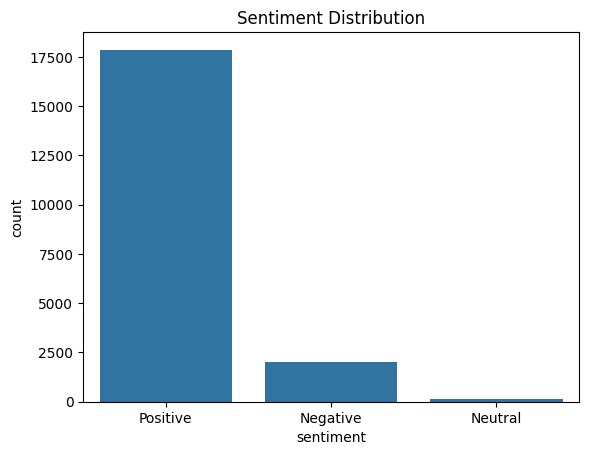

In [ ]:
# Visualize sentiment distribution
sns.countplot(x=review_df["sentiment"])
plt.title("Sentiment Distribution")
plt.show()

Now, which type of sentiment (positive, negative, or neutral) is more likely to occur for useful reviews?

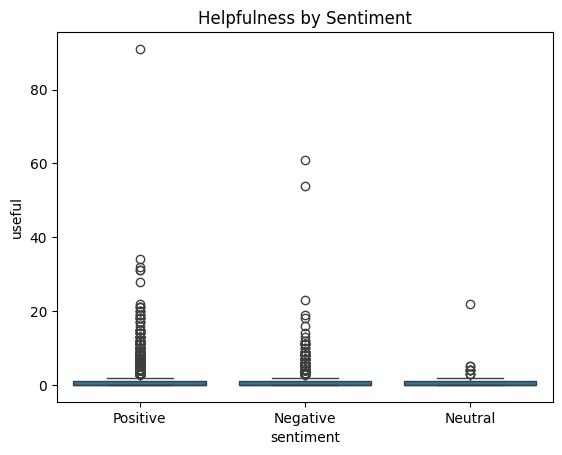

In [ ]:
sns.boxplot(data=review_df, x='sentiment', y='useful')
plt.title("Helpfulness by Sentiment")
plt.show()

**Discussion Prompt:** Does sentiment (positive vs negative) appear to affect how helpful a review is?

### 3.2 More Fine-Grained Emotions

Now, let's go beyond simply categorizing sentiment as positive and negative, and rather see what specific emotions are being expressed.

To do that, we'll be using the NRCLex package, an MIT-approved lexicon by Mark M. Bailey. The emotions included are:



1.   fear
2.   anger
3.   anticipation
4.   trust
5.   surprise
6.   sadness
7.   disgust
8.   joy
9.   positive
10.   negative

(In the code below, we'll exclude the overarching "positive" and "negative" categories to look at specific emotions, as well as "anticipation".)

In [ ]:
def get_emotions(text):
    emotions = NRCLex(text).raw_emotion_scores
    emotions.pop('positive', None)
    emotions.pop('negative', None)
    emotions.pop('anticipation', None)
    return emotions

**Exercise: Emotion Processing**

Choose an emotion (e.g., anger, joy) and write a sentence that gets a high score on that emotion.

Then write a sentence that gets scores on as many different emotions as possible.

In [ ]:
# Your turn!

emotional_sentence = ""
mixed_sentence = ""

print(get_emotions(emotional_sentence))
print(get_emotions(mixed_sentence))

{}
{}


In [ ]:
# Add emotion columns
emotion_df = review_df['cleaned_comments'].apply(lambda x: pd.Series(NRCLex(x).raw_emotion_scores))
review_df = pd.concat([review_df, emotion_df.fillna(0)], axis=1)

<ipython-input-13-16262495ab42>:2: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  emotion_df = review_df['cleaned_comments'].apply(lambda x: pd.Series(NRCLex(x).raw_emotion_scores))
<ipython-input-13-16262495ab42>:2: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  emotion_df = review_df['cleaned_comments'].apply(lambda x: pd.Series(NRCLex(x).raw_emotion_scores))
<ipython-input-13-16262495ab42>:2: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  emotion_df = review_df['cleaned_comments'].apply(lambda x: pd.Series(NRCLex(x).raw_emotion_scores))
<ipython-input-13-16262495ab42>:2: FutureWarning: The default dtype for empty Series will be 'object' inst

In [ ]:
review_df.head()

,review_id,user_id,business_id,stars,useful,funny,cool,text,date,cleaned_comments,...,positive,anger,disgust,fear,negative,sadness,joy,trust,anticipation,surprise
0,KU_O5udG6zpxOg-VcAEodg,mh_-eMZ6K5RLWhZyISBhwA,XQfwVwDr-v0ZS3_CbbE5Xw,3,0,0,0,"If you decide to eat here, just be aware it is...",2018-07-07 22:09:11,decide eat aware going take hours beginning en...,...,5.0,1.0,1.0,1.0,2.0,1.0,4.0,3.0,6.0,3.0
1,BiTunyQ73aT9WBnpR9DZGw,OyoGAe7OKpv6SyGZT5g77Q,7ATYjTIgM3jUlt4UM3IypQ,5,1,0,1,I've taken a lot of spin classes over the year...,2012-01-03 15:28:18,taken lot spin classes years nothing compares ...,...,10.0,2.0,0.0,0.0,1.0,0.0,4.0,7.0,4.0,3.0
2,saUsX_uimxRlCVr67Z4Jig,8g_iMtfSiwikVnbP2etR0A,YjUWPpI6HXG530lwP-fb2A,3,0,0,0,Family diner. Had the buffet. Eclectic assortm...,2014-02-05 20:30:30,family diner buffet eclectic assortment large ...,...,5.0,1.0,0.0,1.0,1.0,0.0,3.0,4.0,4.0,2.0
3,AqPFMleE6RsU23_auESxiA,_7bHUi9Uuf5__HHc_Q8guQ,kxX2SOes4o-D3ZQBkiMRfA,5,1,0,1,"Wow! Yummy, different, delicious. Our favo...",2015-01-04 00:01:03,wow yummy different delicious favorite lamb cu...,...,4.0,0.0,0.0,0.0,0.0,0.0,4.0,2.0,1.0,0.0
4,Sx8TMOWLNuJBWer-0pcmoA,bcjbaE6dDog4jkNY91ncLQ,e4Vwtrqf-wpJfwesgvdgxQ,4,1,0,1,Cute interior and owner (?) gave us tour of up...,2017-01-14 20:54:15,cute interior owner gave us tour upcoming area...,...,6.0,1.0,1.0,0.0,1.0,1.0,4.0,2.0,4.0,1.0


We'll now look at the correlations between specific emotions and how helpful they are perceived to be.

**Discussion Prompt:** Before running the code below, what emotion do *you* think will be most correlated with helpfulness? Why?

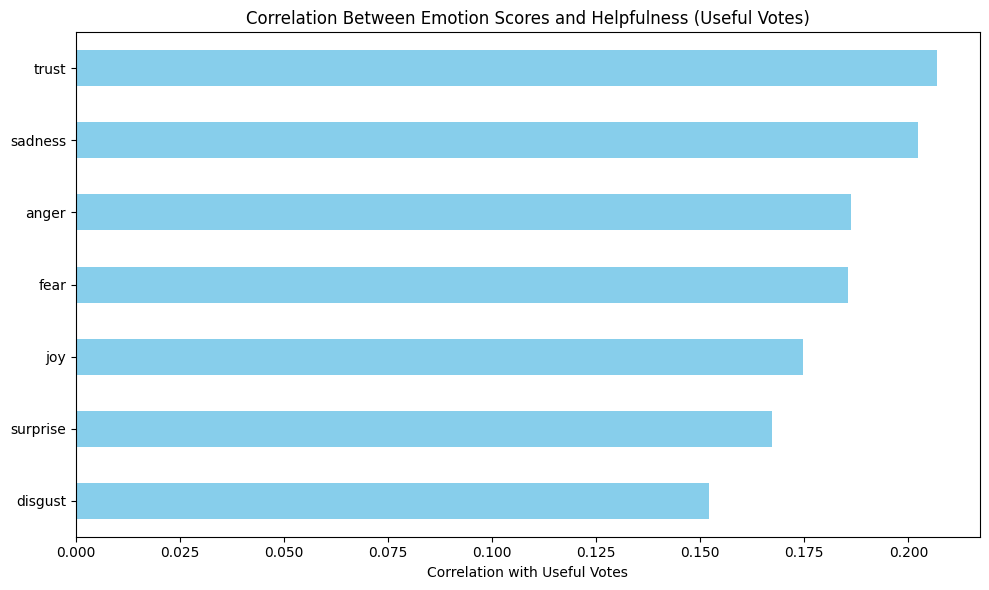

In [ ]:
# Correlation between each emotion and 'useful' votes
emotion_columns = [col for col in emotion_df.columns if col not in ['positive', 'negative', 'anticipation']]
correlations = review_df[emotion_columns + ['useful']].corr()['useful'].drop('useful')

# Bar plot of correlation
plt.figure(figsize=(10, 6))
correlations.sort_values().plot(kind='barh', color='skyblue')
plt.title("Correlation Between Emotion Scores and Helpfulness (Useful Votes)")
plt.xlabel("Correlation with Useful Votes")
plt.tight_layout()
plt.show()

**Discussion Prompt:** Which emotions are *actually* most positively or negatively correlated with helpfulness in this dataset?

**Exercise: Scatterplots**

Choose one emotion to visualize in a scatterplot, plotting that emotion against usefulness.

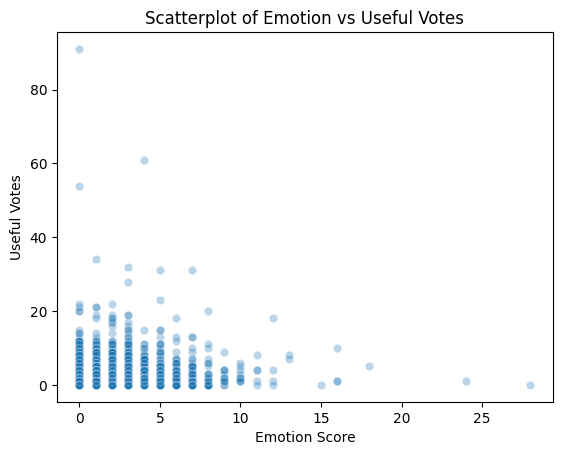

In [ ]:
# Your turn!

x_emotion = ""

sns.scatterplot(data=review_df, x=x_emotion, y='useful', alpha=0.3)
plt.title("Scatterplot of Emotion vs Useful Votes")
plt.xlabel("Emotion Score")
plt.ylabel("Useful Votes")
plt.show()

Now we'll run a multiple regression, regressing usefulness on each emotion!

In [ ]:
X = review_df[emotion_columns]
y = review_df['useful']

# Add constant for intercept
X = sm.add_constant(X)
model = sm.OLS(y, X).fit()

# Print summary
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                 useful   R-squared:                       0.060
Model:                            OLS   Adj. R-squared:                  0.060
Method:                 Least Squares   F-statistic:                     183.2
Date:                Thu, 03 Apr 2025   Prob (F-statistic):          3.94e-264
Time:                        01:49:49   Log-Likelihood:                -40984.
No. Observations:               20000   AIC:                         8.198e+04
Df Residuals:                   19992   BIC:                         8.205e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.4054      0.020     19.785      0.0

**Discussion Prompt:** In the regression output, which emotions are statistically significant predictors of helpfulness? (That is, *p* < .05).

Are they high-arousal or low-arousal? How do these findings relate to the Berger & Milkman paper? Why do you think this is the case?

**Optional Exercises:** Here are some ways you can dive into this dataset further.

* See if different emotions better predict different metrics, such as star ratings.
* Add other factors, such as review length, to the multiple regression.
* *Challenge:* Choose a certain type of business (e.g., restaurants), filter the review dataframe to only include these types of businesses, and see if the results change. *Note:* This will require the business dataset, so ask us if you're up for this challenge!